In [225]:
import cv2
import numpy as np
import scipy.signal as sp

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

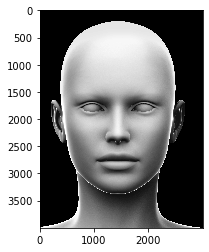

In [226]:
img = cv2.imread("super_face.png", cv2.IMREAD_COLOR)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [169]:
int(800 / 4000 * 2995)

599

Image is large, rescaling...
Final Image shape is (800, 599)


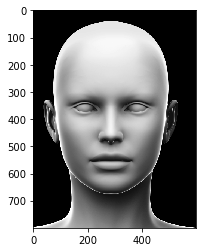

In [227]:
bw_img = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)

if (bw_img.shape[0] > 800):
    print("Image is large, rescaling...")
    bw_img = cv2.resize(bw_img, (int(800 / bw_img.shape[0] * bw_img.shape[1]), 800), interpolation = cv2.INTER_AREA)
    
print(f"Final Image shape is {bw_img.shape}")

plt.imshow(bw_img, "gray")

In [228]:
#
# Parameters
#
SQUARE_SIZE = 5
HEIGHT_SCALE = 16
HEIGHT_WIDTH = 1
BLACK_OFFSET = HEIGHT_WIDTH*HEIGHT_SCALE + SQUARE_SIZE

#
# Colors
#
clr_base_tile = 70
clr_tile_border = 25
clr_south_wall = 40
clr_west_wall = 50

#
# Objects
#
obj_base_tile = np.zeros((SQUARE_SIZE, SQUARE_SIZE))
obj_base_tile.fill(clr_base_tile)
obj_base_tile[0, :] = clr_tile_border
obj_base_tile[:, SQUARE_SIZE - 1] = clr_tile_border

# Make the brick 9x9, not 8x8
#obj_base_tile[:, 0] = clr_tile_border
#obj_base_tile[SQUARE_SIZE - 1, :] = clr_tile_border

#
# Convert input black and white image to tiles
# This is just to visualize squared picture
#

# TODO: apply this transformation straight to the small image
#squared_img = np.zeros(bw_img.shape)

#for ii in range(bw_img.shape[0] // SQUARE_SIZE):
#    for jj in range(bw_img.shape[1] // SQUARE_SIZE):
#        squared_img[ii*SQUARE_SIZE:(ii+1)*SQUARE_SIZE, jj*SQUARE_SIZE:(jj+1)*SQUARE_SIZE] = \
#            int(np.mean(bw_img[ii*SQUARE_SIZE:(ii+1)*SQUARE_SIZE, jj*SQUARE_SIZE:(jj+1)*SQUARE_SIZE]))
        
#plt.imshow(squared_img, "gray")

In [229]:
%%time
#
# Convert input black and white image to small picture and mean convolve
#
filter = np.zeros((SQUARE_SIZE, SQUARE_SIZE))
filter.fill(1.0 / SQUARE_SIZE**2)

small_img = sp.convolve2d(bw_img, filter[::-1, ::-1], mode="valid")[::SQUARE_SIZE, ::SQUARE_SIZE]

CPU times: user 51.3 ms, sys: 0 ns, total: 51.3 ms
Wall time: 50.3 ms


In [220]:
filter

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [205]:
ttt

array([[1, 2, 7],
       [8, 4, 7],
       [0, 5, 6]])

In [210]:
import skimage as sk

ttt = np.array([[1, 2, 7, 6], [8, 4, 7, 5], [0, 5, 6, 4], [9, 3, 7, 3]])

ttt2 = sk.util.view_as_windows(ttt, (2, 2), 2)
ttt2

array([[[[1, 2],
         [8, 4]],

        [[7, 6],
         [7, 5]]],


       [[[0, 5],
         [9, 3]],

        [[6, 4],
         [7, 3]]]])

In [214]:
filter = np.array([[0.25, 0.25], [0.25, 0.25]])

sp.convolve2d(ttt, filter[::-1, ::-1], mode='valid')[::2, ::2].astype(int)

array([[3, 6],
       [4, 5]])

In [173]:
#
# Make smaller picture to increase speed
#
small_squared_img = np.zeros((bw_img.shape[0] // SQUARE_SIZE, bw_img.shape[1] // SQUARE_SIZE))

for ii in range(small_squared_img.shape[0]):
    for jj in range(small_squared_img.shape[1]):
        small_squared_img[ii, jj] = squared_img[ii*SQUARE_SIZE, jj*SQUARE_SIZE]



CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 15.3 ms


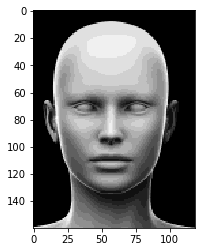

In [233]:
%%time
#
# Scale the image of tiles
#

# Find the minimum NON-BLACK color: TODO: double-check whether it's needed

# Why do I use scaled_img?
# Should I use small_squared_img instead?
# apply NumPy digitize

# Do scale
scaled_small_img = small_img - small_img.min()

scale = np.linspace(0, scaled_small_img.max(), HEIGHT_SCALE + 1)

#for ii in range(scaled_img.shape[0]):
#    for jj in range(scaled_img.shape[1]):
#        # TODO: optimize this part using argmax or something
#        kk = 0
#        while (scaled_img[ii, jj] > scale[kk]):    
#            kk = kk + 1
#        scaled_img[ii, jj] = kk

scaled_small_img = np.digitize(scaled_small_img, scale) - 1
        
#print(scaled_img.min(), scaled_img.max())
plt.imshow(scaled_small_img, "gray")

In [177]:
ttt = np.array([[1, 2, 7], [8, 4, 7], [0, 5, 6]])
vvv = [0, 3, 6, 9]
np.digitize(ttt, vvv)

array([[1, 1, 3],
       [3, 2, 3],
       [1, 2, 3]])

In [180]:
ttt.mean()

4.444444444444445

In [189]:
ttt.astype(float)

array([[1., 2., 7.],
       [8., 4., 7.],
       [0., 5., 6.]])

In [232]:
scaled_small_img

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  2, ...,  1,  1,  1],
       [14, 16, 16, ...,  8,  7,  5]])

CPU times: user 300 ms, sys: 46.5 ms, total: 347 ms
Wall time: 297 ms


True

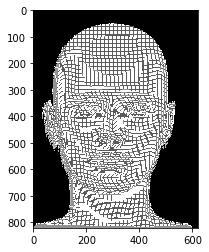

In [234]:
%%time

#
# Main body
#

# This one makes the black border!
final_img = np.zeros((bw_img.shape[0] + BLACK_OFFSET, bw_img.shape[1] + BLACK_OFFSET))

# Actually fills the image with tiles and height
for ii in range(scaled_small_img.shape[0]):
    for jj in range(scaled_small_img.shape[1] - 1, -1, -1):
        height_value = int(scaled_small_img[ii, jj])
        
        if (height_value > 0):
            left_lower_row = (ii + 1)*SQUARE_SIZE - 1 + BLACK_OFFSET
            left_lower_col = jj*SQUARE_SIZE

            for kk in range(0, height_value*HEIGHT_WIDTH):
                final_img[left_lower_row - kk, (left_lower_col + kk):(left_lower_col + SQUARE_SIZE + kk)] = clr_south_wall
                final_img[(left_lower_row - SQUARE_SIZE - kk + BLACK_OFFSET):(left_lower_row - kk - 1 + BLACK_OFFSET), left_lower_col + kk] = clr_west_wall

            final_img[(left_lower_row - SQUARE_SIZE - kk):(left_lower_row - kk), 
                      (left_lower_col + kk):(left_lower_col + SQUARE_SIZE + kk)] = obj_base_tile

# Show the result
plt.imshow(final_img, "gray")

# Save the result: the OS picture viewer works better!
cv2.imwrite("result_3D.png", final_img)